<a href="https://colab.research.google.com/github/avinregmi/PyTorch-Lessons/blob/master/2.Basic_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


Text(0.5, 0, 'x')

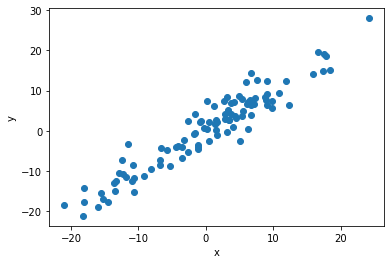

In [2]:
X = torch.randn(100,1)*10
y = X + 3*torch.randn(100,1)
plt.plot(X.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [4]:
model = LR(1,1)
torch.manual_seed(1)
print(list(model.parameters()))
print('\n')
print(model)

[Parameter containing:
tensor([[0.8091]], requires_grad=True), Parameter containing:
tensor([0.2886], requires_grad=True)]


LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())
  

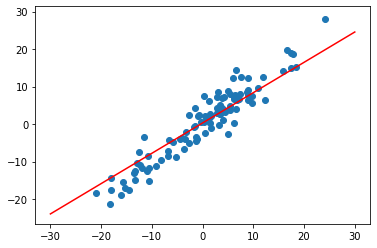

In [6]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30,30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y)
  plt.show()
plot_fit('Untrained Data')

In [7]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
epochs = 100

losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch:", i, "loss: ", loss.item())

  losses.append(loss) #optional
  optimizer.zero_grad() #clear out gradient
  loss.backward() 
  optimizer.step()


epoch: 0 loss:  12.035856246948242
epoch: 1 loss:  10.761073112487793
epoch: 2 loss:  10.035913467407227
epoch: 3 loss:  9.623404502868652
epoch: 4 loss:  9.388744354248047
epoch: 5 loss:  9.255252838134766
epoch: 6 loss:  9.179311752319336
epoch: 7 loss:  9.136106491088867
epoch: 8 loss:  9.11152458190918
epoch: 9 loss:  9.097536087036133
epoch: 10 loss:  9.08957290649414
epoch: 11 loss:  9.085039138793945
epoch: 12 loss:  9.082454681396484
epoch: 13 loss:  9.08098030090332
epoch: 14 loss:  9.0801362991333
epoch: 15 loss:  9.079652786254883
epoch: 16 loss:  9.079373359680176
epoch: 17 loss:  9.079211235046387
epoch: 18 loss:  9.079113960266113
epoch: 19 loss:  9.079055786132812
epoch: 20 loss:  9.079019546508789
epoch: 21 loss:  9.078994750976562
epoch: 22 loss:  9.078978538513184
epoch: 23 loss:  9.078965187072754
epoch: 24 loss:  9.07895565032959
epoch: 25 loss:  9.078947067260742
epoch: 26 loss:  9.078939437866211
epoch: 27 loss:  9.078932762145996
epoch: 28 loss:  9.07892608642578

Text(0.5, 0, 'epoch')

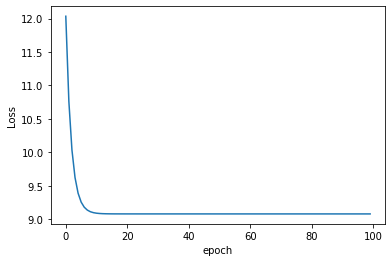

In [8]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

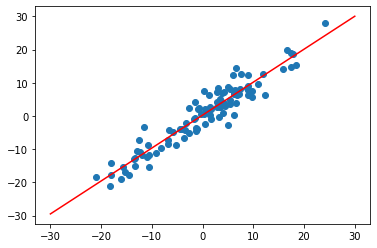

In [9]:
plot_fit("Trained Model")